<a href="https://colab.research.google.com/github/skhetrapal/practise_codes/blob/main/House_prices_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prices Linear Regression, Random Forest**

# **Load Data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/skhetrapal/kaggle_projects/main/house-prices-advanced-regression-techniques/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df = df.drop('Id',axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## **Extracting Numerical data**

In [ ]:
list(set(df.dtypes.tolist()))


[dtype('int64'), dtype('float64'), dtype('O')]

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


**Droppped the rows where any of the columns had an entry of NaN**

In [ ]:
df_num = df_num.fillna(df_num.mean())
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


## **Data visualization**

In [ ]:
import matplotlib.pyplot as plt

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


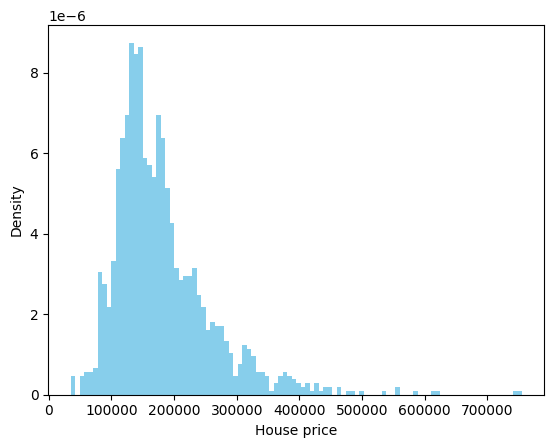

In [ ]:
print(df['SalePrice'].describe())

plt.hist(df['SalePrice'],bins=100, density=True, histtype='stepfilled', color='skyblue')
plt.xlabel('House price')
plt.ylabel('Density')
plt.show()

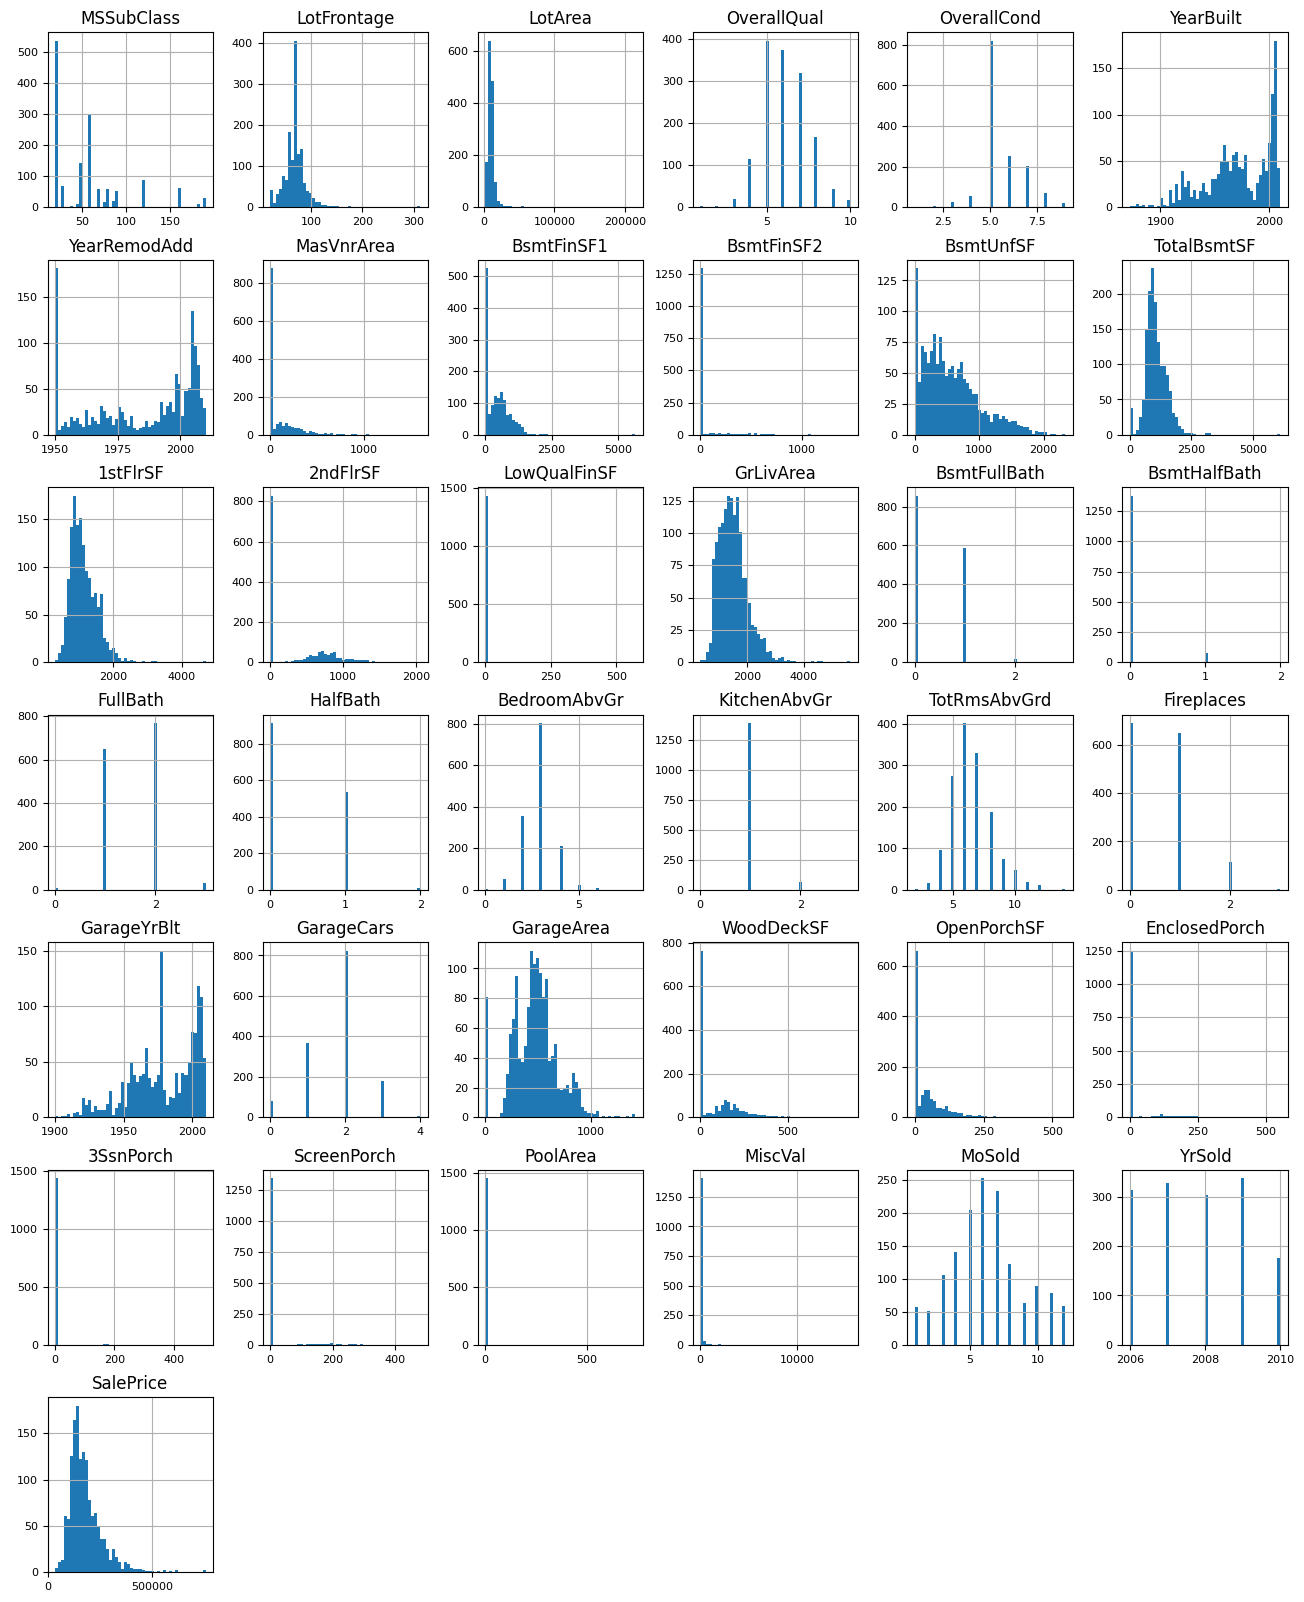

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# **Data Preparation**

## **Data separation as X and Y**

In [ ]:
y = df_num['SalePrice']
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [ ]:
X = df_num.drop('SalePrice', axis = 1)
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


## **Train-Validation split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,294,250,0,0,0,0,0,0,6,2010
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,380,0,40,0,0,0,0,0,5,2009
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,0,328,0,164,0,0,0,0,5,2008
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,240,0,0,264,0,0,0,0,6,2007
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,308,0,0,242,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,78.0,9317,6,5,2006,2006,0.0,24,0,...,440,0,22,0,0,0,0,0,3,2007
1130,50,65.0,7804,4,3,1928,1950,0.0,622,0,...,576,431,44,0,0,0,0,0,12,2009
1294,20,60.0,8172,5,7,1955,1990,0.0,167,0,...,572,0,0,0,0,0,0,0,4,2006
860,50,55.0,7642,7,8,1918,1998,0.0,0,0,...,216,0,240,0,0,0,0,0,6,2007


In [ ]:
X_val

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
892,20,70.0,8414,6,8,1963,2003,0.0,663,0,...,264,192,0,0,0,0,0,0,2,2006
1105,60,98.0,12256,8,5,1994,1995,362.0,1032,0,...,712,186,32,0,0,0,0,0,4,2010
413,30,56.0,8960,5,6,1927,1950,0.0,0,0,...,360,0,0,130,0,0,0,0,3,2010
522,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,420,0,24,36,0,0,0,0,10,2006
1036,20,89.0,12898,9,5,2007,2008,70.0,1022,0,...,912,228,0,0,0,0,0,0,9,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,30,50.0,5925,4,7,1937,2000,435.0,168,0,...,672,0,72,0,0,0,0,0,3,2007
1361,20,124.0,16158,7,5,2005,2005,16.0,1274,0,...,430,168,36,0,0,0,0,0,6,2009
802,60,63.0,8199,7,5,2005,2005,0.0,648,0,...,410,36,18,0,0,0,0,0,10,2008
651,70,60.0,9084,4,5,1940,1950,0.0,0,0,...,296,120,0,0,0,0,0,0,10,2009


In [ ]:
import numpy as np

y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

print(y_train_log)
print(y_val_log)

254     11.884489
1066    12.089539
638     11.350407
799     12.072541
380     11.751942
          ...    
1095    12.080691
1130    11.813030
1294    11.652687
860     12.154516
1126    12.066811
Name: SalePrice, Length: 1168, dtype: float64
892     11.947949
1105    12.691580
413     11.652687
522     11.976659
1036    12.661914
          ...    
479     11.401670
1361    12.468437
802     12.149502
651     11.589887
722     11.732061
Name: SalePrice, Length: 292, dtype: float64


# **Model Building**

## **Linear Regression**

### **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

### **Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_val_pred = lr.predict(X_val)

In [ ]:
import pandas as pd
df = pd.DataFrame(y_lr_train_pred)
print(df)  # Shows the first few rows by default
print(df.head())  # Explicitly shows the first few rows
print(df.tail())

              0
0     11.790914
1     12.143944
2     11.408873
3     11.963898
4     11.744049
...         ...
1163  12.093586
1164  11.823688
1165  11.834665
1166  11.966827
1167  12.259982

[1168 rows x 1 columns]
           0
0  11.790914
1  12.143944
2  11.408873
3  11.963898
4  11.744049
              0
1163  12.093586
1164  11.823688
1165  11.834665
1166  11.966827
1167  12.259982


In [ ]:
print(df.describe(percentiles=[0]))

                 0
count  1168.000000
mean     12.030652
std       0.363056
min      10.793422
0%       10.793422
50%      12.022771
max      13.675765


In [ ]:
y_lr_val_pred

array([11.95056678, 12.62987317, 11.66286993, 12.06150584, 12.62551102,
       11.3452306 , 12.35964406, 11.92040924, 11.34508992, 11.86830346,
       11.90111059, 11.71033039, 11.41841426, 12.17701472, 12.13314878,
       11.81273155, 12.23511058, 11.77028733, 11.63261478, 12.28446469,
       12.03075645, 12.22831619, 12.12422821, 11.80243613, 12.21542186,
       11.88689721, 12.153778  , 11.46225036, 12.0788215 , 12.09864989,
       11.68346139, 12.49897949, 12.15431237, 11.54061564, 12.51521425,
       11.94816366, 11.82677904, 12.28327626, 12.785873  , 11.49510373,
       11.8038036 , 12.40027913, 11.62486009, 12.58243088, 11.75806217,
       11.62578051, 11.5904536 , 11.78720422, 12.8876204 , 11.69146996,
       11.64855519, 12.20823746, 11.65894483, 12.70220519, 11.92512522,
       12.36914938, 12.31021377, 11.91254992, 11.92929583, 11.6830543 ,
       11.32306492, 11.89312609, 12.58731231, 12.40288668, 12.54683893,
       12.30351741, 11.53338008, 12.712586  , 11.6305388 , 11.95

In [ ]:
y_lr_val_pred

array([11.95056678, 12.62987317, 11.66286993, 12.06150584, 12.62551102,
       11.3452306 , 12.35964406, 11.92040924, 11.34508992, 11.86830346,
       11.90111059, 11.71033039, 11.41841426, 12.17701472, 12.13314878,
       11.81273155, 12.23511058, 11.77028733, 11.63261478, 12.28446469,
       12.03075645, 12.22831619, 12.12422821, 11.80243613, 12.21542186,
       11.88689721, 12.153778  , 11.46225036, 12.0788215 , 12.09864989,
       11.68346139, 12.49897949, 12.15431237, 11.54061564, 12.51521425,
       11.94816366, 11.82677904, 12.28327626, 12.785873  , 11.49510373,
       11.8038036 , 12.40027913, 11.62486009, 12.58243088, 11.75806217,
       11.62578051, 11.5904536 , 11.78720422, 12.8876204 , 11.69146996,
       11.64855519, 12.20823746, 11.65894483, 12.70220519, 11.92512522,
       12.36914938, 12.31021377, 11.91254992, 11.92929583, 11.6830543 ,
       11.32306492, 11.89312609, 12.58731231, 12.40288668, 12.54683893,
       12.30351741, 11.53338008, 12.712586  , 11.6305388 , 11.95

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
lr_train_mse = mean_squared_error(y_train_log, y_lr_train_pred)
lr_train_rmse = np.sqrt(lr_train_mse)

lr_val_mse = mean_squared_error(y_val_log, y_lr_val_pred)
lr_val_rmse = np.sqrt(lr_val_mse)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR RMSE (Train): ', lr_train_rmse)

print('LR MSE (Val): ', lr_val_mse)
print('LR RMSE (Val): ', lr_val_rmse)

LR MSE (Train):  0.020747534703528706
LR RMSE (Train):  0.14404004548572144
LR MSE (Val):  0.023063340860230253
LR RMSE (Val):  0.1518661939347604


In [ ]:
delta_lr_rmse = lr_val_mse - lr_train_mse
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_rmse,  lr_val_mse,lr_val_rmse,  delta_lr_rmse]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training RMSE',  'Val MSE', 'Val RMSE',  'Delta RMSE']

In [ ]:
lr_results

,Method,Training MSE,Training RMSE,Val MSE,Val RMSE,Delta RMSE
0,Linear regression,0.020748,0.14404,0.023063,0.151866,0.002316


## **Random Forest**

### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=42, n_estimators=200)
rf.fit(X_train, y_train_log)

RandomForestRegressor(max_depth=2, n_estimators=200, random_state=42)

### **Applying model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_val_pred = rf.predict(X_val)

### **Evaluating model performance**

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rf_train_mse = mean_squared_error(y_train_log,y_rf_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)

rf_val_mse = mean_squared_error(y_val_log, y_rf_val_pred)
rf_val_rmse = np.sqrt(rf_val_mse)

In [ ]:
delta_rf_rmse = rf_val_mse - rf_train_mse
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_rmse,  rf_val_mse, rf_val_rmse,  delta_rf_rmse]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training RMSE',  'Val MSE', 'Val RMSE',  'Delta RMSE']
rf_results

,Method,Training MSE,Training RMSE,Val MSE,Val RMSE,Delta RMSE
0,Random forest,0.051788,0.22757,0.062316,0.249631,0.010528


## **House Price regression using Neural Network**

### **Load Libraries**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import matplotlib.pyplot as plt

In [ ]:
!pip install keras-tuner

import keras_tuner as kt

# Now you can use RandomSearch
from keras_tuner import RandomSearch

### **Data preparation**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)

X_val = scaler.fit_transform(X_val)
X_val = scaler.transform(X_val)

### **Building Neural Network**

In [ ]:
!pip install keras-tuner -q

import keras_tuner as kt

from keras_tuner import HyperParameters

# Create HyperParameters object and define hyperparameters
hp = HyperParameters()
hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])

def build_model(hp):
  # Your model building logic here
  model = Sequential()
  model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=X_train.shape[1]))
  model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
  model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
  model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
  model.add(Dense(1))
  # Use hp for accessing hyperparameters
  optimizer_name = hp.get('optimizer')

  if optimizer_name == 'adam':
      optimizer = Adam(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log'))
  elif optimizer_name == 'sgd':
      optimizer = SGD(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log'))
  else:
      optimizer = RMSprop(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log'))

  lr = hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log')
  model.compile(optimizer=optimizer, loss='mean_squared_error')

  return model



### **Hyperparameter Tuning**

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=2,
    directory='my_dir',
    project_name='house_prices',
    hyperparameters=hp  # Pass the HyperParameters object here
)


Reloading Tuner from my_dir/house_prices/tuner0.json


### **Training the best model**

In [ ]:
tuner.search(X_train, y_train_log, epochs=10, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(X_train, y_train_log, epochs=50, validation_split=0.2)

Epoch 1/50
30/30 [==============================] - 8s 39ms/step - loss: 30629804084559872.0000 - val_loss: 11255322576420864.0000
Epoch 2/50
30/30 [==============================] - 1s 34ms/step - loss: 8352393372631040.0000 - val_loss: 4789596130902016.0000
Epoch 3/50
30/30 [==============================] - 1s 27ms/step - loss: 4203283166003200.0000 - val_loss: 2784849546969088.0000
Epoch 4/50
30/30 [==============================] - 1s 29ms/step - loss: 2535118673543168.0000 - val_loss: 1868213331689472.0000
Epoch 5/50
30/30 [==============================] - 1s 20ms/step - loss: 1778032440246272.0000 - val_loss: 1308509031366656.0000
Epoch 6/50
30/30 [==============================] - 1s 36ms/step - loss: 1253418425384960.0000 - val_loss: 947386100744192.0000
Epoch 7/50
30/30 [==============================] - 1s 29ms/step - loss: 897097469526016.0000 - val_loss: 691584022609920.0000
Epoch 8/50
30/30 [==============================] - 1s 21ms/step - loss: 669180332343296.0000 - va

### **Best Model Evaluation**

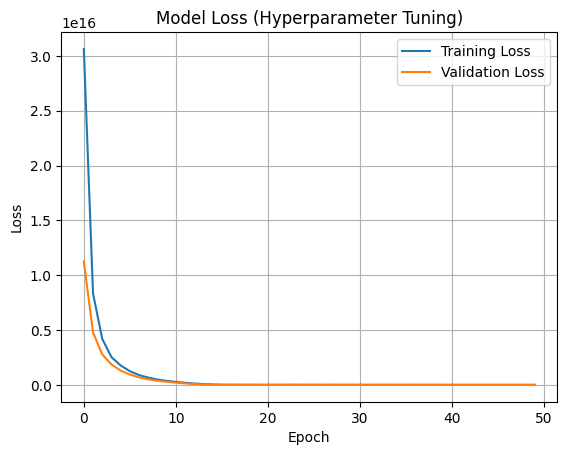

In [ ]:
history =  best_model.history  # Assuming first trial

# Access the loss history correctly
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the loss curves
#import matplotlib.pyplot as plt

plt.plot(training_loss,label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')

plt.title('Model Loss (Hyperparameter Tuning)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#use the best model to obtain prediction on test data

y_nn_train_pred = np.log(best_model.predict(X_train))
y_nn_val_pred = np.log(best_model.predict(X_val))


df = pd.DataFrame(y_nn_train_pred)
print(df)  # Shows the first few rows by default
print(df.head())  # Explicitly shows the first few rows
print(df.tail())
# If your target variable was log-transformed, inverse transform the predictions
#y_pred = np.exp(y_pred_log)
print(y_train_log)


 1/10 [==>...........................] - ETA: 0s

<ipython-input-53-7469d2d15a80>:3: RuntimeWarning: invalid value encountered in log
  y_nn_train_pred = np.log(best_model.predict(X_train))


10/10 [==============================] - 0s 4ms/step
              0
0     12.409301
1     12.390970
2     11.392669
3     11.812051
4     12.486999
...         ...
1163  12.440095
1164  12.647284
1165  12.244046
1166  12.329138
1167  13.287313

[1168 rows x 1 columns]
           0
0  12.409301
1  12.390970
2  11.392669
3  11.812051
4  12.486999
              0
1163  12.440095
1164  12.647284
1165  12.244046
1166  12.329138
1167  13.287313
254     11.884489
1066    12.089539
638     11.350407
799     12.072541
380     11.751942
          ...    
1095    12.080691
1130    11.813030
1294    11.652687
860     12.154516
1126    12.066811
Name: SalePrice, Length: 1168, dtype: float64


<ipython-input-53-7469d2d15a80>:4: RuntimeWarning: invalid value encountered in log
  y_nn_val_pred = np.log(best_model.predict(X_val))


In [ ]:
print(df.describe(percentiles=[0]))

                 0
count  1114.000000
mean     12.141867
std       0.701631
min       7.770333
0%        7.770333
50%      12.225392
max      16.003054


In [ ]:
df.fillna(df.mean())
df

,0
0,12.409301
1,12.390970
2,11.392669
3,11.812051
4,12.486999
...,...
1163,12.440095
1164,12.647284
1165,12.244046
1166,12.329138


In [ ]:
print(df.describe(percentiles=[0]))

                 0
count  1114.000000
mean     12.141867
std       0.701631
min       7.770333
0%        7.770333
50%      12.225392
max      16.003054


### **Evaluating model performance**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Check for NaNs and handle them accordingly
print("Number of NaNs in y_train_log:", np.isnan(y_train_log).sum())
print("Number of NaNs in y_nn_train_pred:", np.isnan(y_nn_train_pred).sum())
print("Number of NaNs in y_val_log:", np.isnan(y_val_log).sum())
print("Number of NaNs in y_nn_val_pred:", np.isnan(y_nn_val_pred).sum())

# Option 1: Remove rows with NaNs (if applicable)
# y_train_log_clean = y_train_log[~np.isnan(y_train_log)]
# y_nn_train_pred_clean = y_nn_train_pred[~np.isnan(y_nn_train_pred)]

# Option 2: Impute NaNs with a suitable value (e.g., mean, median)
y_train_log_imputed = np.nan_to_num(y_train_log, nan=np.nanmean(y_train_log))
y_nn_train_pred_imputed = np.nan_to_num(y_nn_train_pred, nan=np.nanmean(y_nn_train_pred))

y_val_log_imputed = np.nan_to_num(y_val_log, nan=np.nanmean(y_val_log))
y_nn_val_pred_imputed = np.nan_to_num(y_nn_val_pred, nan=np.nanmean(y_nn_val_pred))

# Calculate MSE after handling NaNs (choose one of the options above)
nn_train_mse = mean_squared_error(y_train_log_imputed, y_nn_train_pred_imputed)  # Or use imputed arrays
nn_train_rmse = np.sqrt(nn_train_mse)

nn_val_mse = mean_squared_error(y_val_log_imputed, y_nn_val_pred_imputed)
nn_val_rmse = np.sqrt(nn_val_mse)

print("Training RMSE:", nn_train_rmse)
print("Validation RMSE:", nn_val_rmse)

Number of NaNs in y_train_log: 0
Number of NaNs in y_nn_train_pred: 54
Number of NaNs in y_val_log: 0
Number of NaNs in y_nn_val_pred: 12
Training RMSE: 0.7491348949197055
Validation RMSE: 0.709322775783358


In [ ]:
# nn_train_mse = mean_squared_error(y_train_log,y_nn_train_pred)
# nn_train_rmse = np.sqrt(nn_train_mse)

# nn_val_mse = mean_squared_error(y_val_log, y_nn_val_pred)
# nn_val_rmse = np.sqrt(nn_val_mse)

In [ ]:
delta_nn_rmse = nn_val_mse - nn_train_mse
nn_results = pd.DataFrame(['Neural Network', nn_train_mse, nn_train_rmse,  nn_val_mse, nn_val_rmse,  delta_nn_rmse]).transpose()
nn_results.columns = ['Method', 'Training MSE', 'Training RMSE',  'Val MSE', 'Val RMSE',  'Delta RMSE']
nn_results

,Method,Training MSE,Training RMSE,Val MSE,Val RMSE,Delta RMSE
0,Neural Network,0.561203,0.749135,0.503139,0.709323,-0.058064


## **Model Comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results, nn_results], axis=0)

In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training RMSE,Val MSE,Val RMSE,Delta RMSE
0,Linear regression,0.020748,0.14404,0.023063,0.151866,0.002316
1,Random forest,0.051788,0.22757,0.062316,0.249631,0.010528
2,Neural Network,0.561203,0.749135,0.503139,0.709323,-0.058064


# **Visualization of Predicted results**

## **Linear Regression**

 
0.8639


Text(0.5, 0, 'Experimental House Price')

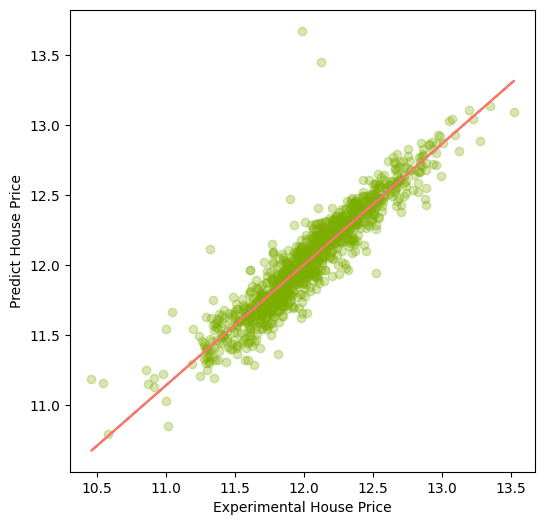

In [ ]:
import numpy as np

plt.figure(figsize=(6,6))
plt.scatter(x=y_train_log, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train_log, y_lr_train_pred, 1)
p = np.poly1d(z)
print(np.polyder(p))

plt.plot(y_train_log, p(y_train_log), '#F8766D')
plt.ylabel('Predict House Price')
plt.xlabel('Experimental House Price')

## **Random Forest**

 
0.6084


Text(0.5, 0, 'Experimental House Price')

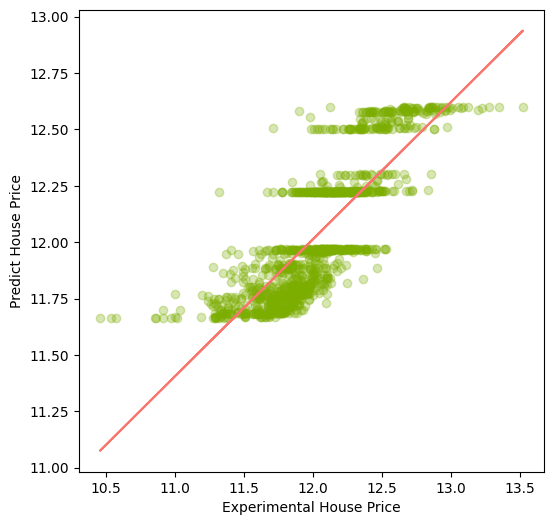

In [ ]:
import numpy as np

plt.figure(figsize=(6,6))
plt.scatter(x=y_train_log, y=y_rf_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train_log, y_rf_train_pred, 1)
p = np.poly1d(z)
print(np.polyder(p))

plt.plot(y_train_log, p(y_train_log), '#F8766D')
plt.ylabel('Predict House Price')
plt.xlabel('Experimental House Price')

## **Neural Net**

 
0.2385


Text(0.5, 0, 'Experimental House Price')

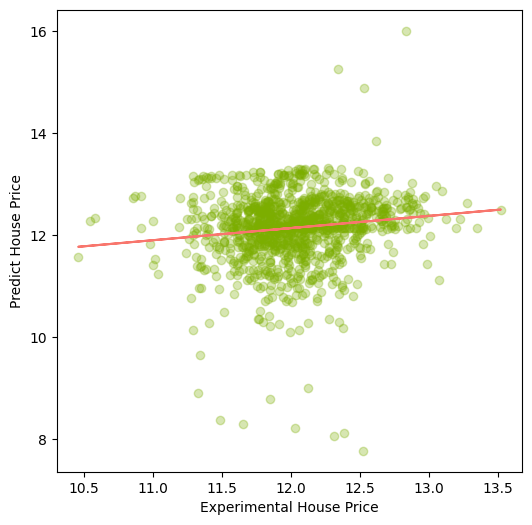

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x=y_train_log, y=y_nn_train_pred_imputed, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train_log, y_nn_train_pred_imputed, 1)
p = np.poly1d(z.flatten())
print(np.polyder(p))

plt.plot(y_train_log, p(y_train_log), '#F8766D')
plt.ylabel('Predict House Price')
plt.xlabel('Experimental House Price')

# **Implementation of chosen model (Logistic Regression) on Test data**
Model chosen based on lowest Delta RMSE between training and validation sets

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/skhetrapal/kaggle_projects/main/house-prices-advanced-regression-techniques/test.csv')
test_df

In [ ]:
test_df = test_df.select_dtypes(include = ['float64', 'int64'])
test_df

In [ ]:
test_df = test_df.fillna(test_df.mean())
test_df

In [ ]:
test_id = test_df['Id']
test_id

In [ ]:
X_test = test_df.drop('Id',axis = 1)
X_test

In [ ]:
y_test_log = lr.predict(X_test)
y_test_log

In [ ]:
y_test = np.exp(y_test_log)

In [ ]:
import pandas as pd
df = pd.DataFrame(y_test)
print(df)  # Shows the first few rows by default
print(df.head())  # Explicitly shows the first few rows
print(df.tail())

In [ ]:
print(df.describe(percentiles=[0]))

## **Creating CSV file with predictions**

In [ ]:
data = {'Id': test_id.to_numpy(), 'SalePrice': y_test}
final_df = pd.DataFrame(data)

final_df.to_csv('test_data_predictions_final.csv', index=False)

print("CSV file created successfully!")

In [ ]:
print_df = pd.read_csv('test_data_predictions_final.csv')
print_df

In [ ]:
X_test = scaler.fit_transform(X_test)
X_test = scaler.transform(X_test)